## Teste de Friedman

In [1]:
import warnings
import logging
import os
import numpy as np
import pandas as pd
from scipy.stats import friedmanchisquare

# Filtrar warnings
warnings.filterwarnings('ignore')
logging.getLogger('sklearn').setLevel(logging.ERROR)
os.environ['PYTHONWARNINGS'] = 'ignore'

# Carregar arquivo Excel
excel_file_path = 'metrics_results.xlsx'
excel_data = pd.ExcelFile(excel_file_path)

# Dicionário para armazenar os valores extraídos
extracted_values = {}

# Ler dados de cada aba e extrair as 10 primeiras linhas de cada classificador
for sheet_name in excel_data.sheet_names:
    sheet_df = pd.read_excel(excel_file_path, sheet_name=sheet_name)
    classifiers = sheet_df.columns[1:]  # Ignorar a primeira coluna
    for classifier in classifiers:
        extracted_values[f"{sheet_name}_{classifier}"] = sheet_df[classifier].iloc[:10].tolist()

# Dicionário com as métricas e seus respectivos valores
metrics = {
    "Accuracy": [extracted_values['Accuracy_KNN'], extracted_values['Accuracy_SVM'], 
                 extracted_values['Accuracy_Decision Tree'], extracted_values['Accuracy_LVQ'], 
                 extracted_values['Accuracy_MLP'], extracted_values['Accuracy_Ensemble Neural Network'], 
                 extracted_values['Accuracy_Stacking'], extracted_values['Accuracy_Random Forest'], 
                 extracted_values['Accuracy_XGBoost'], extracted_values['Accuracy_LightGBM']],
    "F1 Score": [extracted_values['F1 Score_KNN'], extracted_values['F1 Score_SVM'], 
                 extracted_values['F1 Score_Decision Tree'], extracted_values['F1 Score_LVQ'], 
                 extracted_values['F1 Score_MLP'], extracted_values['F1 Score_Ensemble Neural Network'], 
                 extracted_values['F1 Score_Stacking'], extracted_values['F1 Score_Random Forest'], 
                 extracted_values['F1 Score_XGBoost'], extracted_values['F1 Score_LightGBM']],
    "Recall": [extracted_values['Recall_KNN'], extracted_values['Recall_SVM'], 
               extracted_values['Recall_Decision Tree'], extracted_values['Recall_LVQ'], 
               extracted_values['Recall_MLP'], extracted_values['Recall_Ensemble Neural Network'], 
               extracted_values['Recall_Stacking'], extracted_values['Recall_Random Forest'], 
               extracted_values['Recall_XGBoost'], extracted_values['Recall_LightGBM']],
    "ACSA": [extracted_values['ACSA_KNN'], extracted_values['ACSA_SVM'], 
             extracted_values['ACSA_Decision Tree'], extracted_values['ACSA_LVQ'], 
             extracted_values['ACSA_MLP'], extracted_values['ACSA_Ensemble Neural Network'], 
             extracted_values['ACSA_Stacking'], extracted_values['ACSA_Random Forest'], 
             extracted_values['ACSA_XGBoost'], extracted_values['ACSA_LightGBM']],
}

# Executar o teste de Friedman
friedman_results = {}
for metric, data in metrics.items():
    stat, p_value = friedmanchisquare(*data)
    friedman_results[metric] = {"Statistic": stat, "P-value": p_value}

# Exportar resultados do teste de Friedman para CSV
friedman_df = pd.DataFrame.from_dict(friedman_results, orient='index')
friedman_df.to_csv('friedman_results.csv')
print("Resultados do teste de Friedman exportados para 'friedman_results.csv'.")


ModuleNotFoundError: No module named 'numpy'

## Teste de Nemenyi

In [5]:
import scikit_posthocs as sp
import numpy as np

# Nomes dos classificadores
classifiers = [
    "KNN", "SVM", "Decision Tree", "LVQ", "MLP",
    "Ensemble Neural Network", "Stacking", "Random Forest", "XGBoost", "LightGBM"
]

# Executar o teste pós-hoc de Nemenyi para métricas significativas
posthoc_results = {}
for metric, data in metrics.items():
    # Verificar se o teste de Friedman indicou diferença significativa
    if friedman_results[metric]["P-value"] < 0.05:
        data_transposed = np.array(data).T  # Transpor os dados
        nemenyi = sp.posthoc_nemenyi_friedman(data_transposed)
        nemenyi.index = classifiers
        nemenyi.columns = classifiers
        posthoc_results[metric] = nemenyi

        # Exportar resultados do teste de Nemenyi para CSV
        nemenyi.to_csv(f'nemenyi_results_{metric}.csv')
        print(f"Resultados do teste de Nemenyi para {metric} exportados para 'nemenyi_results_{metric}.csv'.")


Resultados do teste de Nemenyi para Accuracy exportados para 'nemenyi_results_Accuracy.csv'.
Resultados do teste de Nemenyi para F1 Score exportados para 'nemenyi_results_F1 Score.csv'.
Resultados do teste de Nemenyi para Recall exportados para 'nemenyi_results_Recall.csv'.
Resultados do teste de Nemenyi para ACSA exportados para 'nemenyi_results_ACSA.csv'.


## Mapas de calor teste de Nemenyi

Mapa de calor para Accuracy salvo como 'nemenyi_heatmap_Accuracy.png'.


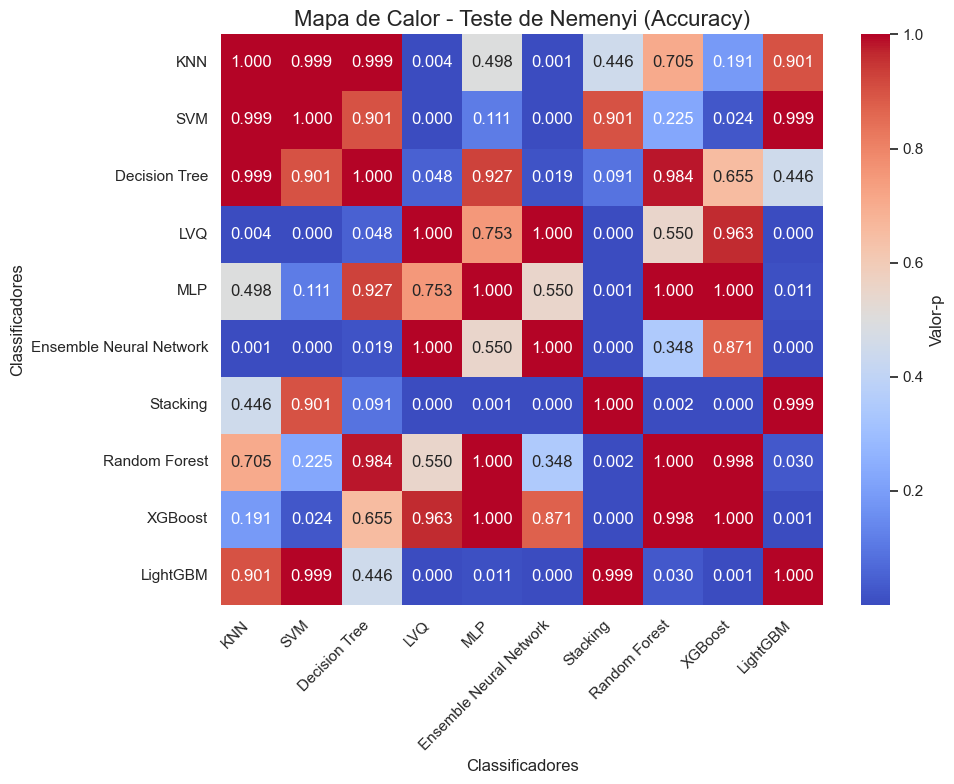

Mapa de calor para F1 Score salvo como 'nemenyi_heatmap_F1 Score.png'.


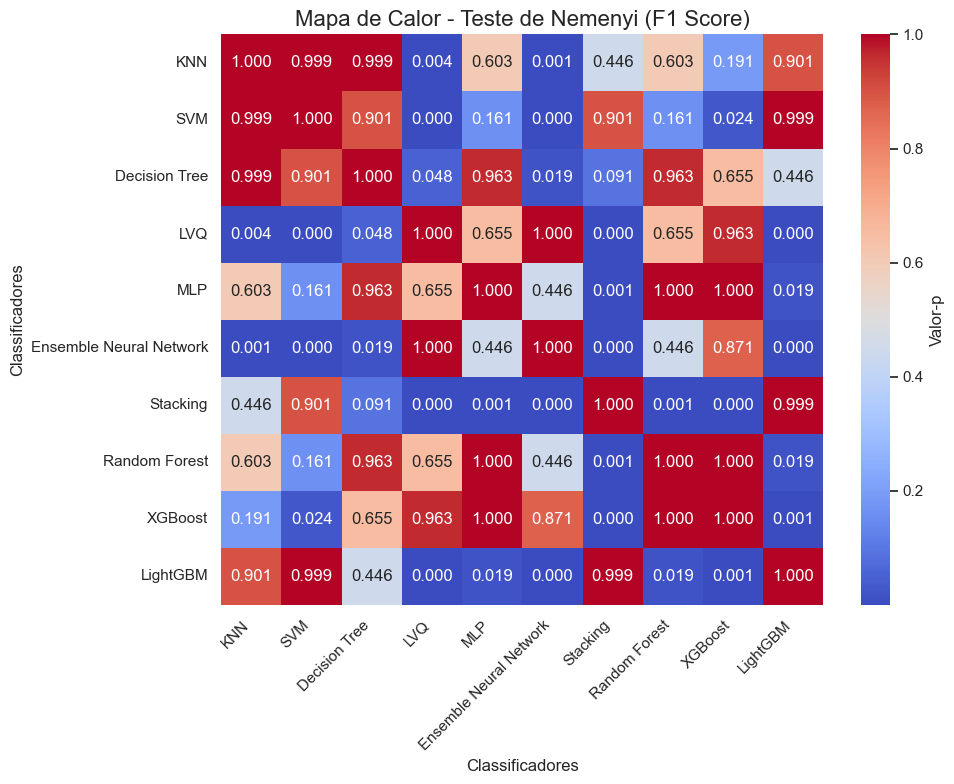

Mapa de calor para Recall salvo como 'nemenyi_heatmap_Recall.png'.


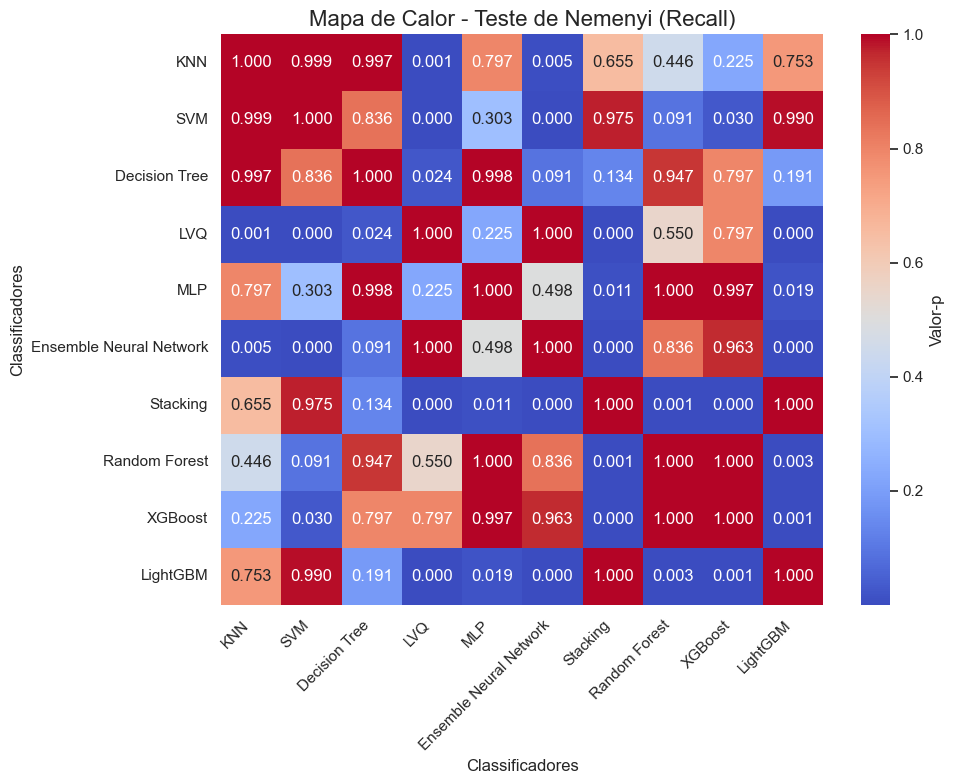

Mapa de calor para ACSA salvo como 'nemenyi_heatmap_ACSA.png'.


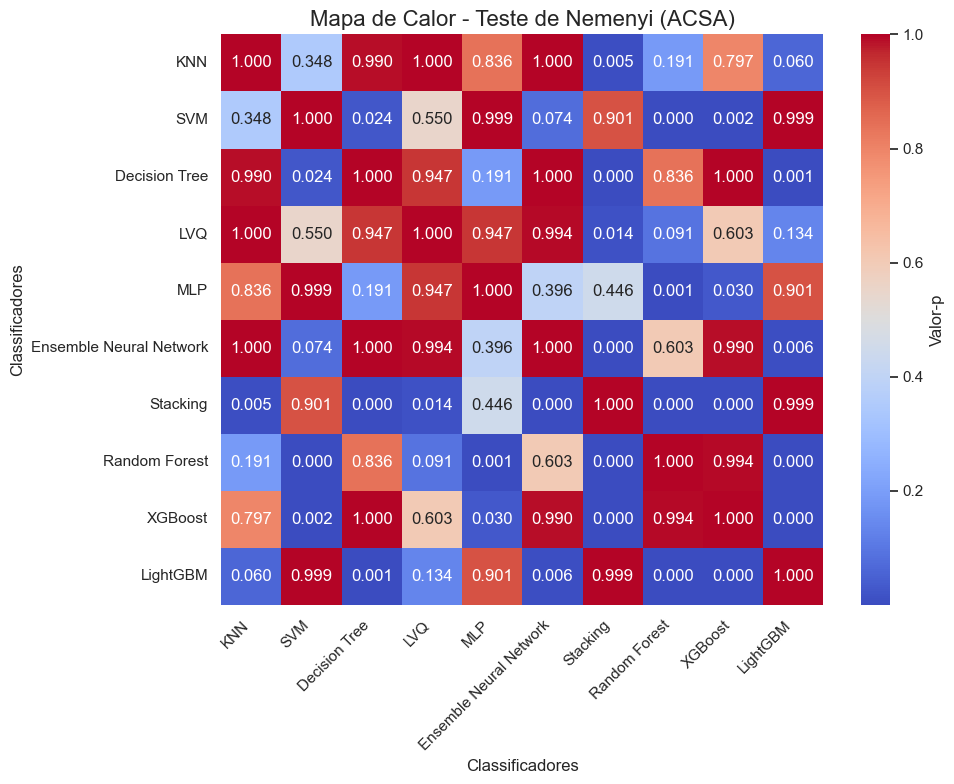

In [7]:
# Certifique-se de executar o teste de Nemenyi primeiro
import seaborn as sns
import matplotlib.pyplot as plt

# Criar heatmaps para as métricas em posthoc_results
if 'posthoc_results' in globals() and posthoc_results:
    for metric, nemenyi_result in posthoc_results.items():
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            nemenyi_result,
            annot=True,
            fmt=".3f",
            cmap="coolwarm",
            cbar_kws={'label': 'Valor-p'},
            xticklabels=nemenyi_result.columns,
            yticklabels=nemenyi_result.index
        )
        plt.title(f'Mapa de Calor - Teste de Nemenyi ({metric})', fontsize=16)
        plt.xlabel('Classificadores', fontsize=12)
        plt.ylabel('Classificadores', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()

        # Salvar mapa de calor como imagem
        heatmap_path = f'nemenyi_heatmap_{metric}.png'
        plt.savefig(heatmap_path)
        print(f"Mapa de calor para {metric} salvo como '{heatmap_path}'.")
        plt.show()
else:
    print("Erro: posthoc_results não está definido. Execute o teste de Nemenyi antes desta célula.")


## Testes Wilcoxon

In [1]:
import warnings
import logging
import os
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon
from itertools import combinations

# Filtrar warnings
warnings.filterwarnings('ignore')
logging.getLogger('sklearn').setLevel(logging.ERROR)
os.environ['PYTHONWARNINGS'] = 'ignore'

# Carregar arquivo Excel
excel_file_path = 'metrics_results.xlsx'
excel_data = pd.ExcelFile(excel_file_path)

# Dicionário para armazenar os valores extraídos
extracted_values = {}

# Ler dados de cada aba e extrair as 10 primeiras linhas de cada classificador
for sheet_name in excel_data.sheet_names:
    sheet_df = pd.read_excel(excel_file_path, sheet_name=sheet_name)
    classifiers = sheet_df.columns[1:]  # Ignorar a primeira coluna
    for classifier in classifiers:
        extracted_values[f"{sheet_name}_{classifier}"] = sheet_df[classifier].iloc[:10].tolist()

# Dicionário com as métricas e seus respectivos valores
metrics = {
    "Accuracy": [extracted_values['Accuracy_KNN'], extracted_values['Accuracy_SVM'], 
                 extracted_values['Accuracy_Decision Tree'], extracted_values['Accuracy_LVQ'], 
                 extracted_values['Accuracy_MLP'], extracted_values['Accuracy_Ensemble Neural Network'], 
                 extracted_values['Accuracy_Stacking'], extracted_values['Accuracy_Random Forest'], 
                 extracted_values['Accuracy_XGBoost'], extracted_values['Accuracy_LightGBM']],
    "F1 Score": [extracted_values['F1 Score_KNN'], extracted_values['F1 Score_SVM'], 
                 extracted_values['F1 Score_Decision Tree'], extracted_values['F1 Score_LVQ'], 
                 extracted_values['F1 Score_MLP'], extracted_values['F1 Score_Ensemble Neural Network'], 
                 extracted_values['F1 Score_Stacking'], extracted_values['F1 Score_Random Forest'], 
                 extracted_values['F1 Score_XGBoost'], extracted_values['F1 Score_LightGBM']],
    "Recall": [extracted_values['Recall_KNN'], extracted_values['Recall_SVM'], 
               extracted_values['Recall_Decision Tree'], extracted_values['Recall_LVQ'], 
               extracted_values['Recall_MLP'], extracted_values['Recall_Ensemble Neural Network'], 
               extracted_values['Recall_Stacking'], extracted_values['Recall_Random Forest'], 
               extracted_values['Recall_XGBoost'], extracted_values['Recall_LightGBM']],
    "ACSA": [extracted_values['ACSA_KNN'], extracted_values['ACSA_SVM'], 
             extracted_values['ACSA_Decision Tree'], extracted_values['ACSA_LVQ'], 
             extracted_values['ACSA_MLP'], extracted_values['ACSA_Ensemble Neural Network'], 
             extracted_values['ACSA_Stacking'], extracted_values['ACSA_Random Forest'], 
             extracted_values['ACSA_XGBoost'], extracted_values['ACSA_LightGBM']],
}

# Lista de classificadores
classifiers = ['KNN', 'SVM', 'Decision Tree', 'LVQ', 'MLP', 'Ensemble Neural Network', 
               'Stacking', 'Random Forest', 'XGBoost', 'LightGBM']

# Executar o teste de Wilcoxon
wilcoxon_results = {}
for metric, data in metrics.items():
    for (i, clf1), (j, clf2) in combinations(enumerate(classifiers), 2):
        stat, p_value = wilcoxon(data[i], data[j])
        wilcoxon_results[f"{metric}_{clf1}_vs_{clf2}"] = {"Statistic": stat, "P-value": p_value}

# Exportar resultados do teste de Wilcoxon para CSV
wilcoxon_df = pd.DataFrame.from_dict(wilcoxon_results, orient='index')
wilcoxon_df.to_csv('wilcoxon_results.csv')
print("Resultados do teste de Wilcoxon exportados para 'wilcoxon_results.csv'.")

Resultados do teste de Wilcoxon exportados para 'wilcoxon_results.csv'.


In [6]:
import pandas as pd

# Carregar o arquivo Excel
file_path = 'results_train_teste_comparison.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Listar as métricas presentes no arquivo
metricas = ['Accuracy', 'F1 Score', 'Recall', 'ACSA']

# Criar um dicionário para armazenar os dados por métrica
abas = {}

# Organizar os dados por métrica
for metrica in metricas:
    metrica_df = df[['Classifier', 'Etapa', metrica]].copy()
    metrica_pivot = metrica_df.pivot(index='Classifier', columns='Etapa', values=metrica)
    
    # Reordenar as colunas para Treinamento antes de Teste
    metrica_pivot = metrica_pivot[['Treinamento', 'Teste']]
    
    # Formatar valores para 4 casas decimais
    metrica_pivot = metrica_pivot.round(4)
    
    abas[metrica] = metrica_pivot

# Salvar os resultados em um novo arquivo Excel
output_path = 'results_organizados.xlsx'
with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    for metrica, tabela in abas.items():
        tabela.to_excel(writer, sheet_name=metrica)

print(f"Arquivo salvo em: {output_path}")


Arquivo salvo em: results_organizados.xlsx
